In [1]:
import pandas as pd
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
pos_ner_df = pd.read_parquet('pos_ner.parquet')

In [3]:
pos_ner_df

,entities,labels
0,Chinese,NORP
1,ChinaBusinessMilitaryWorldSocietyCultureTravel...,DATE
2,2021Home>>Artificial,CARDINAL
3,Chinese,NORP
4,People's Daily,ORG
...,...,...
6274886,FridayTechie,ORG
6274887,InvestmentsResourcesExpert OpinionAboutAdvertise,PERSON
6274888,CenterContact UsWork,PERSON
6274889,2020,DATE


In [4]:
def wordcloud_plt(df):
  data = dict(zip(df['entities'].tolist(), df['counts'].tolist()))


  wordcloud_obj = wordcloud.WordCloud(
      width = 1000,
      height = 500,
      background_color = 'white',
      max_words=30,
      stopwords = wordcloud.STOPWORDS)

  wordcloud_obj.generate_from_frequencies(data)

  fig = plt.figure(
      figsize = (20, 10),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud_obj, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

In [5]:
# Dictionary mapping for combining entities
combine_mapping = {
    'Musk': 'Elon Musk',
    'Biden':'Joe Biden',
    'Covid': 'COVID-19',
    'Gray Media Group, Inc.': 'Gray Media Group',
    'Captioning/Audio DescriptionA Gray Media Group': 'Gray Media Group'
    
}

# Function to combine entities
def combine_entities(entity):
    for key, value in combine_mapping.items():
        if key.lower() in entity.lower():
            return value
    return entity


In [6]:
%%time
# Apply the function to the 'entities' column
pos_ner_df['entities'] = pos_ner_df['entities'].apply(combine_entities)

CPU times: total: 1.73 s
Wall time: 3.86 s


In [7]:
pos_ner_df.loc[pos_ner_df['entities'] == 'OpenAI', 'labels'] = pos_ner_df.loc[pos_ner_df['entities'] == 'OpenAI', 'labels'].replace('GPE', 'ORG')
pos_ner_df.loc[pos_ner_df['entities'] == 'LinkedIn', 'labels'] = pos_ner_df.loc[pos_ner_df['entities'] == 'LinkedIn', 'labels'].replace('GPE', 'ORG')
pos_ner_df.loc[pos_ner_df['entities'] == 'GPT-4', 'labels'] = pos_ner_df.loc[pos_ner_df['entities'] == 'GPT-4', 'labels'].replace('PERSON', 'PRODUCT')

In [8]:
pos_person_df = pos_ner_df[pos_ner_df['labels'] == 'PERSON']
pos_person_df

,entities,labels
23,Wang,PERSON
43,Xiang Yanping,PERSON
45,Xiang,PERSON
93,Associate,PERSON
94,Ville-Petteri Ukonaho,PERSON
...,...,...
6274857,Gautam,PERSON
6274860,Tech30,PERSON
6274883,Reliance Retail,PERSON
6274887,InvestmentsResourcesExpert OpinionAboutAdvertise,PERSON


In [9]:
pos_person_counts = pos_person_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [10]:
pos_person_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
27223,COVID-19,PERSON,4530
161589,Twitter,PERSON,4380
79286,Joe Biden,PERSON,4229
49928,Elon Musk,PERSON,4049
88586,Kim Kardashian,PERSON,2034
66214,Harry,PERSON,1968
1473,AI,PERSON,1719
167495,Weather Alerts Alerts,PERSON,1567
147199,Size,PERSON,1443
100227,Machine Learning,PERSON,1421


### Top People entities

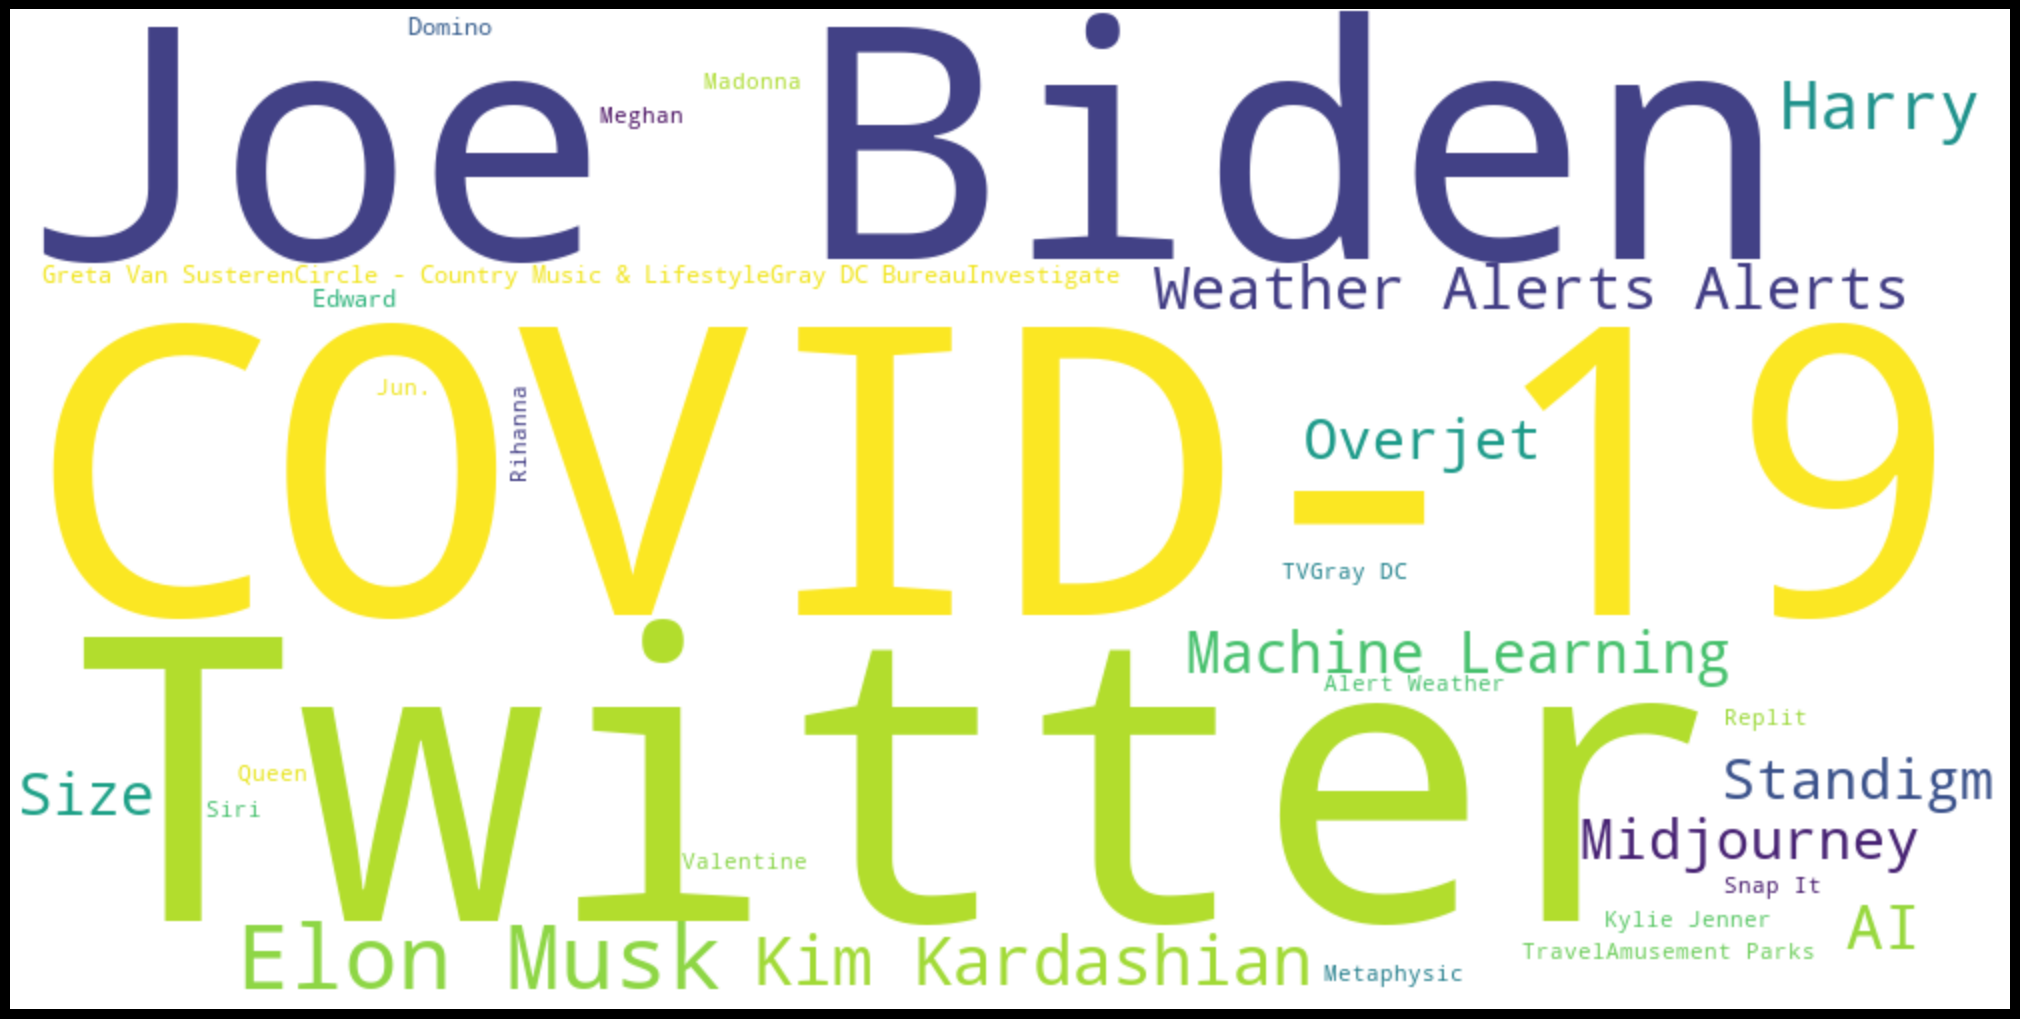

In [11]:
wordcloud_plt(pos_person_counts)

In [12]:
pos_org_df = pos_ner_df[pos_ner_df['labels'] == 'ORG']
pos_org_df

,entities,labels
4,People's Daily,ORG
8,ETC,ORG
12,ETC,ORG
14,People’s Daily Online/Li Wenming)Thanks,ORG
15,ETC,ORG
...,...,...
6274878,Anand Mahindra,ORG
6274879,Team YSHow,ORG
6274880,YSGovt,ORG
6274882,ADIA,ORG


In [13]:
pos_org_counts = pos_org_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [14]:
pos_org_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
5389,AI,ORG,332602
132556,Gray Media Group,ORG,56969
130052,Google,ORG,20480
221355,PRNewswire,ORG,19923
190758,Microsoft,ORG,19666
180131,ML,ORG,16573
59397,COVID-19,ORG,15001
216194,OpenAI,ORG,13434
145202,IBM,ORG,9854
31340,Artificial Intelligence,ORG,9380


### Top Organisational entities

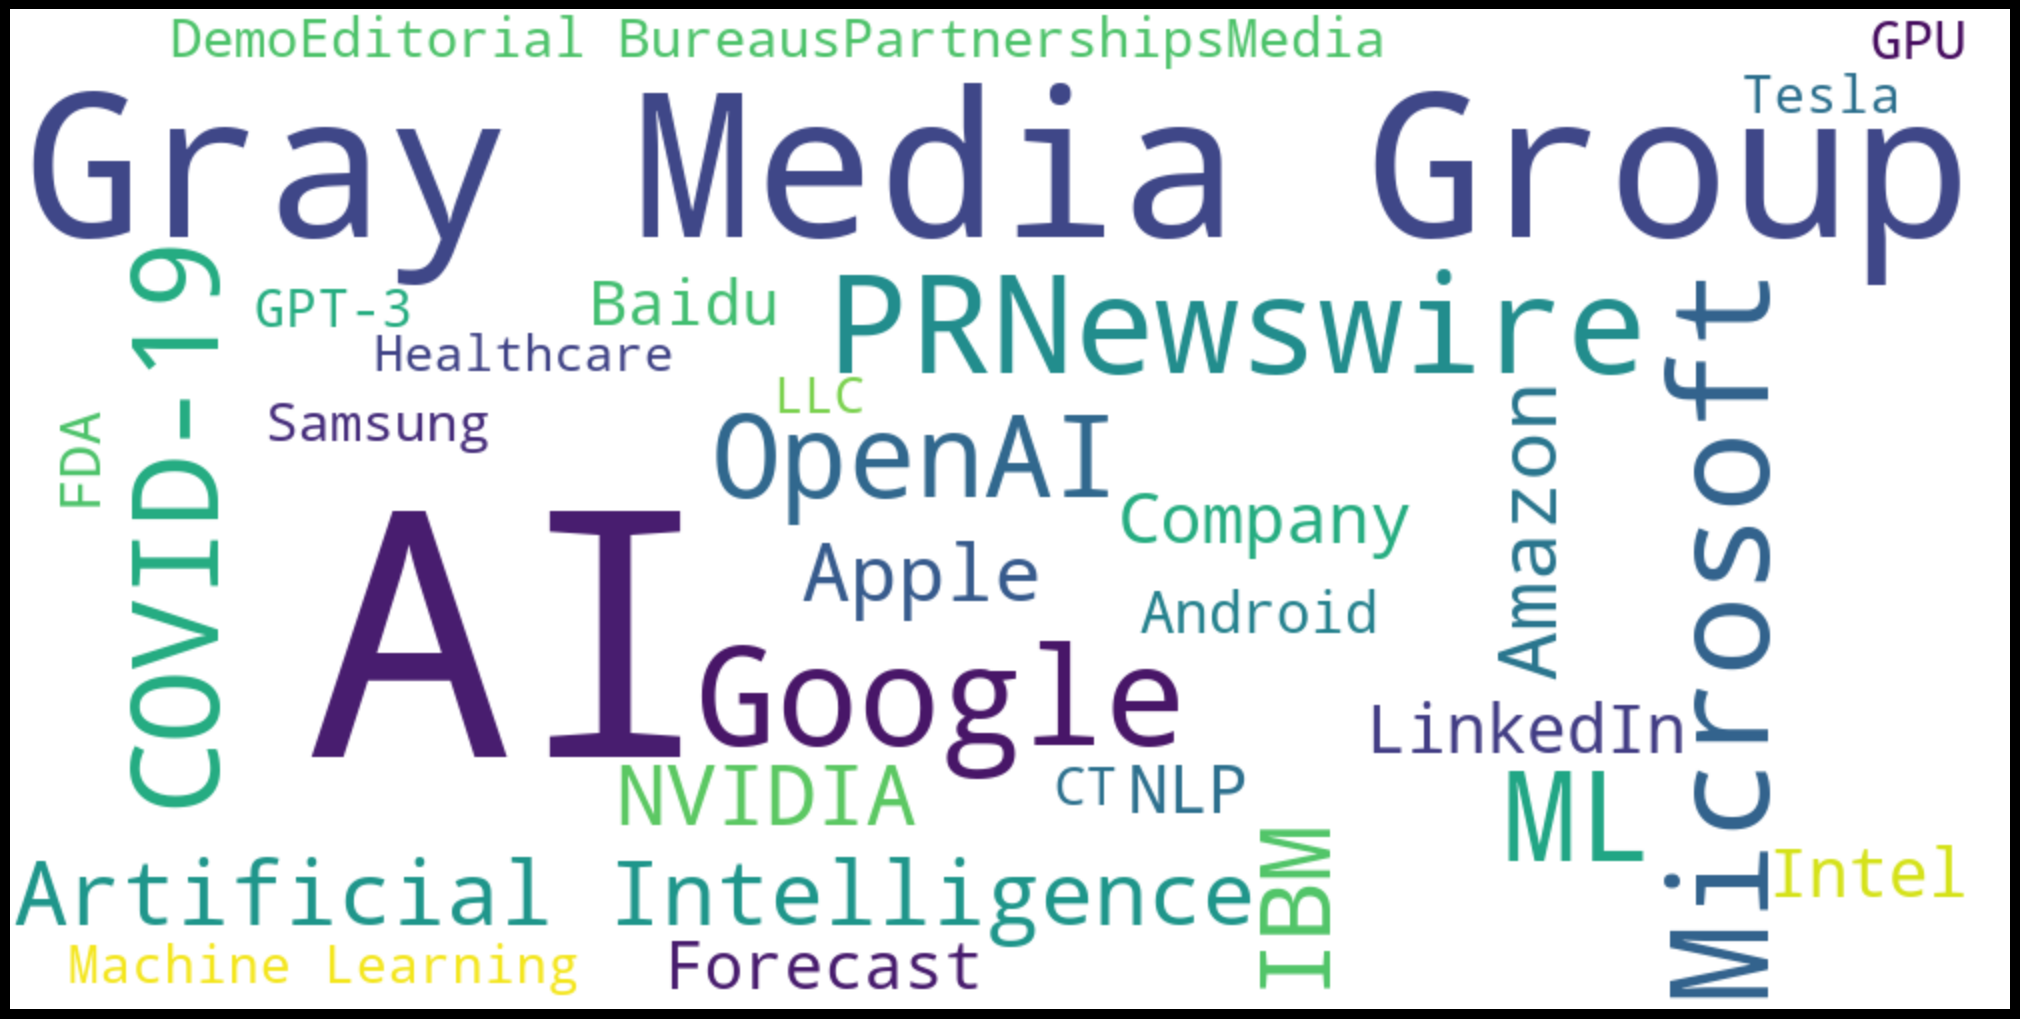

In [15]:
wordcloud_plt(pos_org_counts)

In [16]:
pos_prod_df = pos_ner_df[pos_ner_df['labels'] == 'PRODUCT']
pos_prod_df

,entities,labels
199,TodayApple,PRODUCT
260,Twitter,PRODUCT
340,PostPrevious,PRODUCT
389,Google Plus Pinterest,PRODUCT
436,Altimax,PRODUCT
...,...,...
6274578,ServicePrivacy,PRODUCT
6274653,Fortune 500,PRODUCT
6274655,Ai,PRODUCT
6274673,ServicePrivacy,PRODUCT


In [17]:
pos_prod_counts = pos_prod_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [18]:
pos_prod_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
15675,Twitter,PRODUCT,4359
13299,ServicePrivacy,PRODUCT,2706
6175,GPT-4,PRODUCT,2538
4440,DeepMind,PRODUCT,1050
5278,Excel,PRODUCT,1005
4587,Discovery,PRODUCT,954
5967,Fortune 500,PRODUCT,925
7489,JavaScript,PRODUCT,915
10937,PlayStation,PRODUCT,904
2845,CRM,PRODUCT,900


### Top Product entities

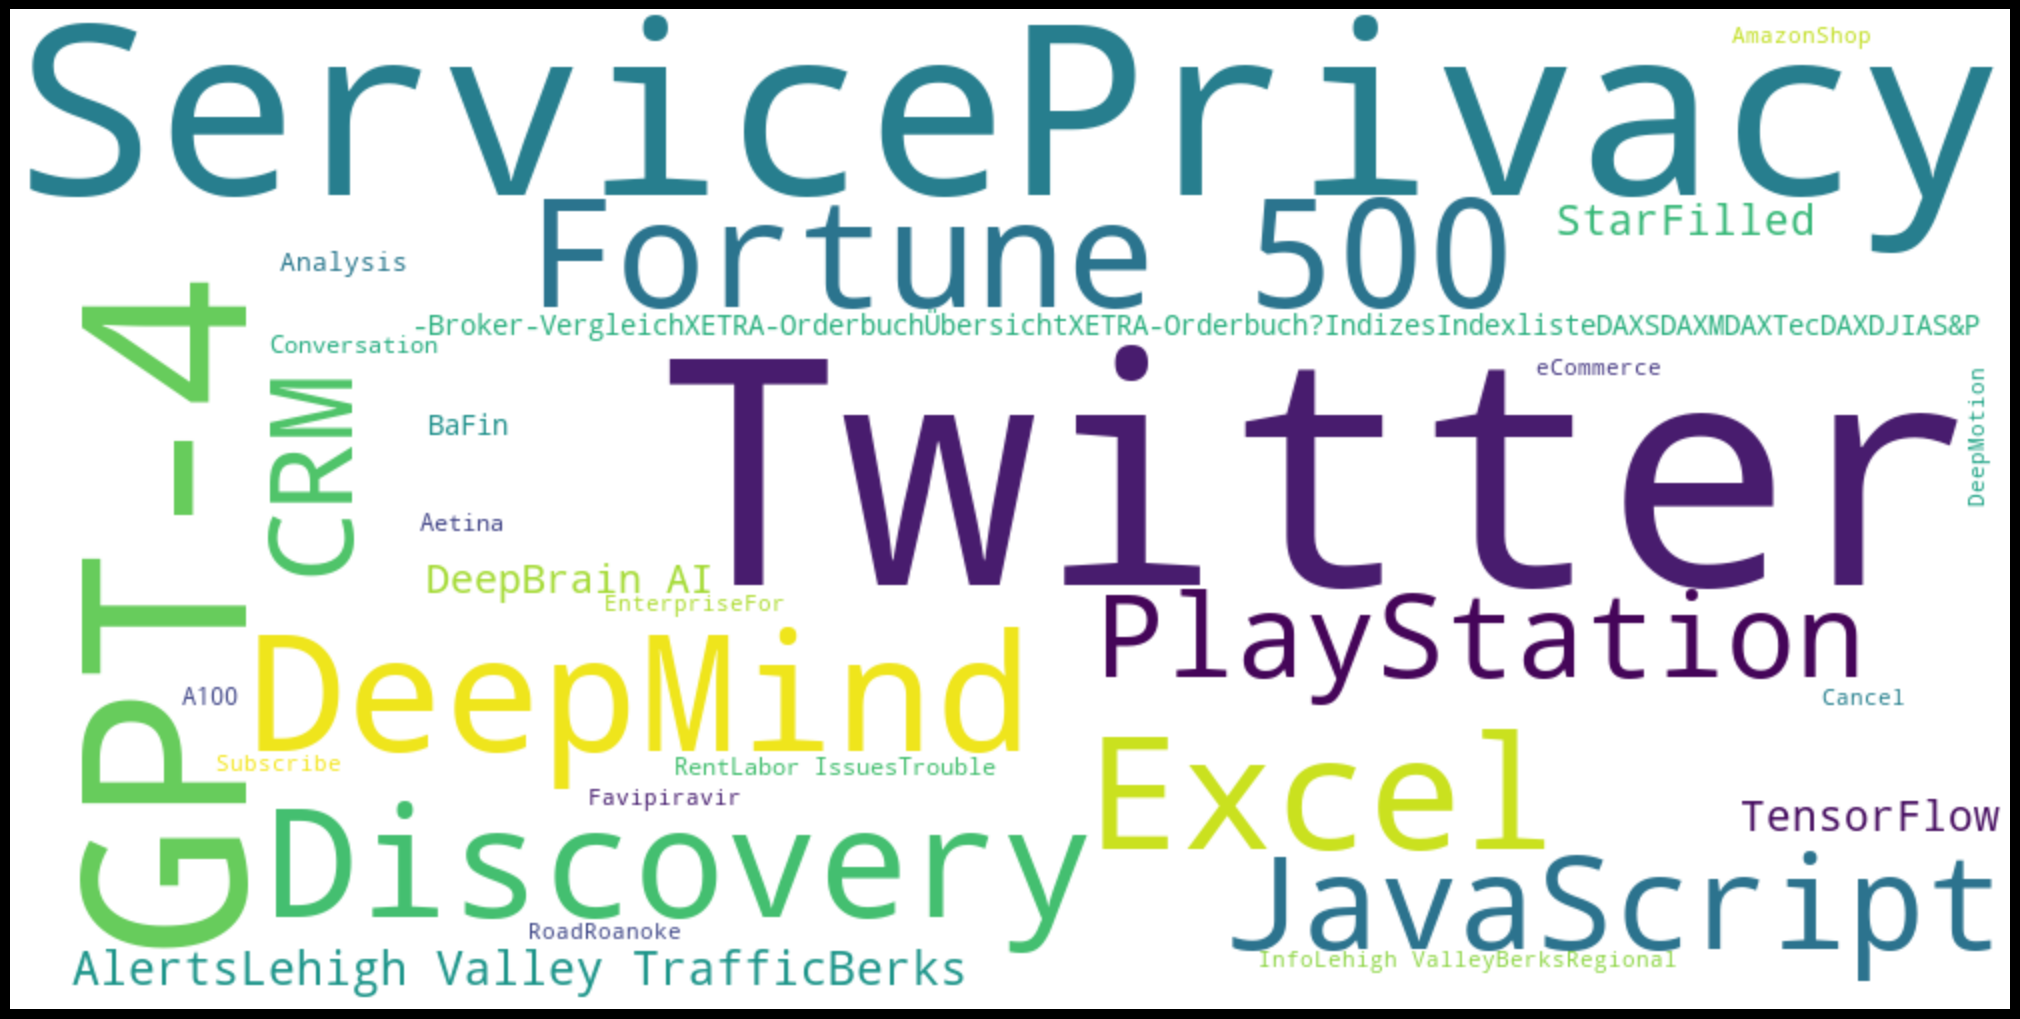

In [19]:
wordcloud_plt(pos_prod_counts)

In [20]:
# Dictionary mapping for combining entities
loc_combine_mapping = {
    'the United States': 'US',
    'United States': 'US',
    'U.S.': 'US',
    'Us': 'US' 
}

# Function to combine entities
def loc_combine_entities(entity):
    for key, value in loc_combine_mapping.items():
        if key.lower() in entity.lower():
            return value
    return entity

In [21]:
%%time
# Apply the function to the 'entities' column
pos_ner_df['entities'] = pos_ner_df['entities'].apply(loc_combine_entities)

CPU times: total: 1.61 s
Wall time: 3.9 s


In [22]:
pos_loc_df = pos_ner_df[pos_ner_df['labels'] == 'GPE']
pos_loc_df

,entities,labels
9,Yangzhuang,GPE
10,Shijingshan district,GPE
11,Beijing,GPE
16,China,GPE
17,Beijing,GPE
...,...,...
6274764,Alibaba,GPE
6274826,Delhi,GPE
6274831,India,GPE
6274848,Gautam,GPE


In [23]:
pos_loc_counts = pos_loc_df.groupby(['entities','labels'])['entities'].count().reset_index(name='counts')

In [24]:
pos_loc_counts.sort_values(['counts'] , ascending=False).head(20)

,entities,labels,counts
24435,US,GPE,80291
10497,India,GPE,15799
4775,China,GPE,13721
24366,UK,GPE,10886
11115,Japan,GPE,7672
4227,Canada,GPE,5832
16410,New York,GPE,5770
13324,London,GPE,5003
12316,LA,GPE,4968
4160,California,GPE,4933


### Top Location entities

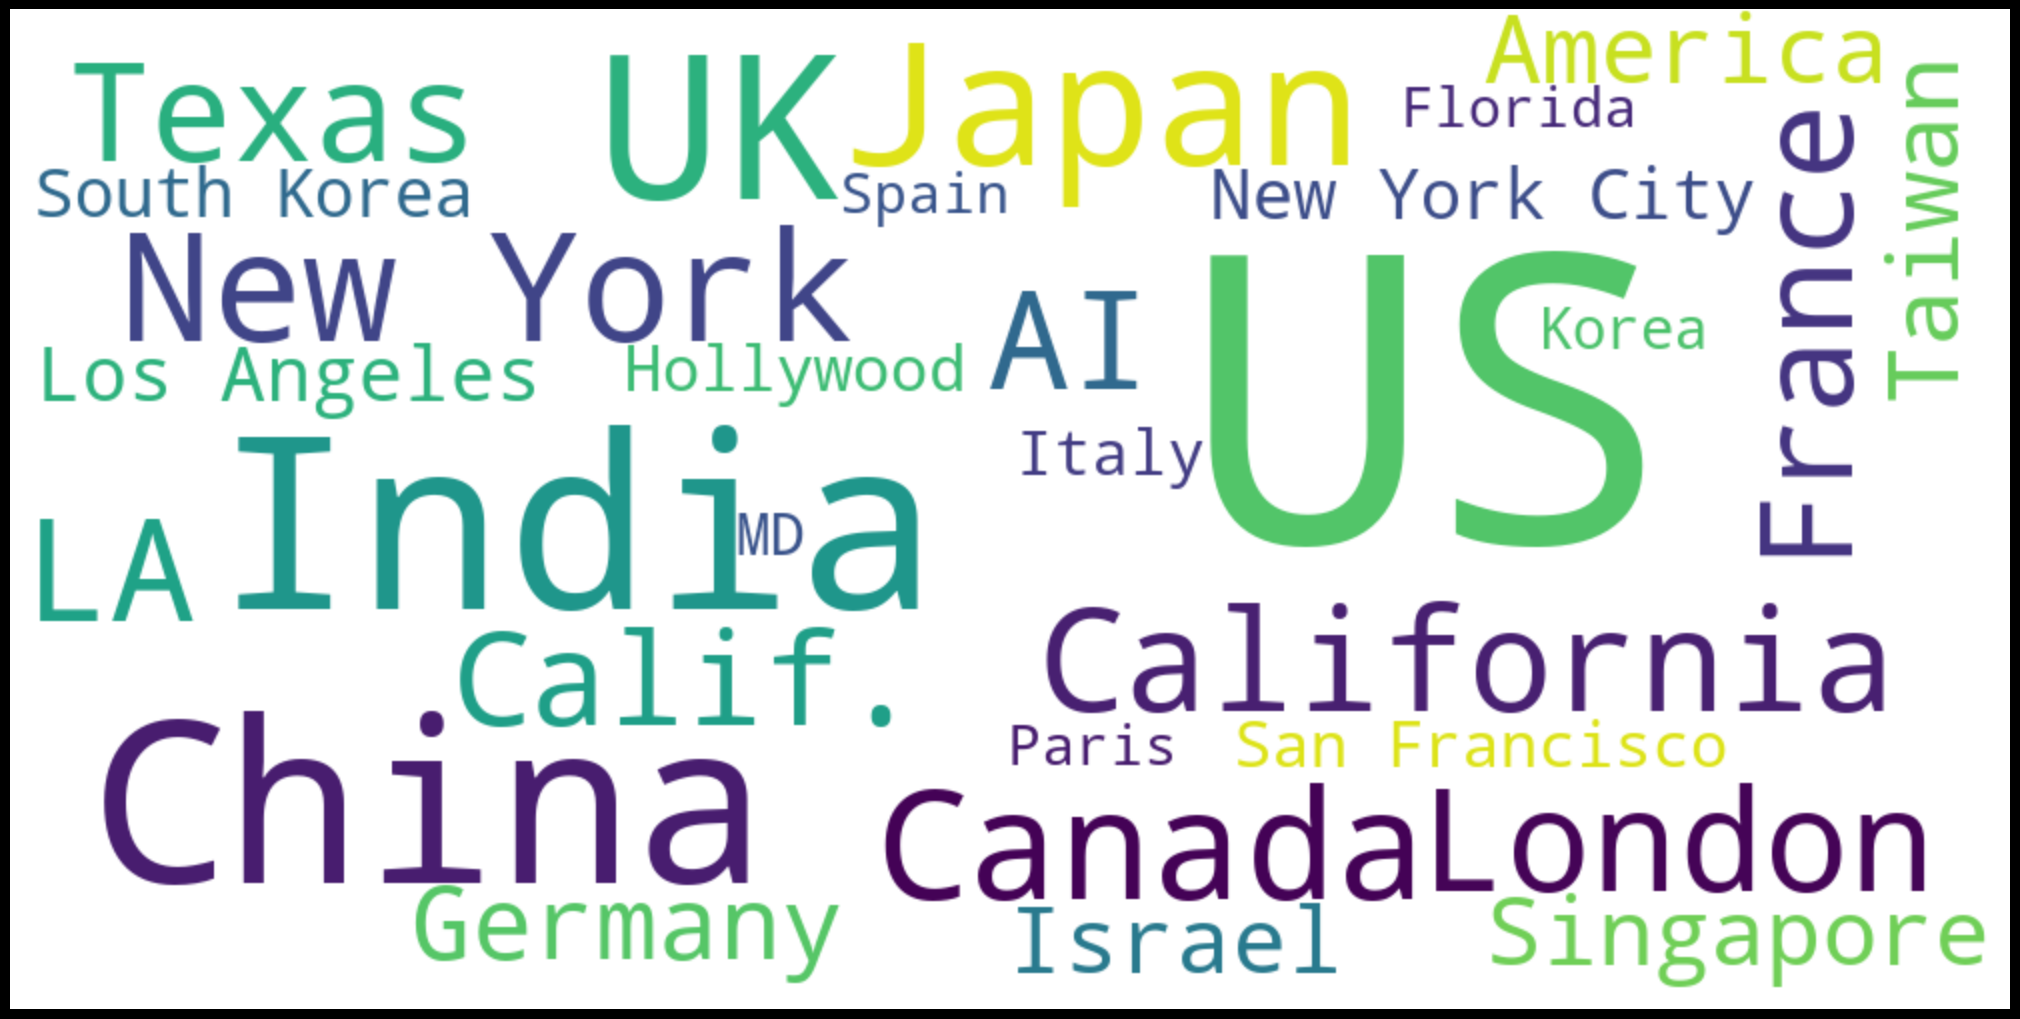

In [25]:
wordcloud_plt(pos_loc_counts)

In [1]:
import os
import re
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from bertopic import BERTopic

pd.set_option('display.max_colwidth', 500)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-05-25 22:17:49.420982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 22:17:53.041522: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 22:17:53.050413: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 22:18:02.043156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
path_lda = '/home/jupyter/data/lda'

if not os.path.isdir(path_lda): os.mkdir(path_lda)

In [3]:
# Load model
saved_model = BERTopic.load(path_lda +'/pos_model')

In [4]:
freq = saved_model.get_topic_info()

print(f"Topics found: {freq.shape[0]}")
freq.head(11)

Topics found: 90


,Topic,Count,Name
0,-1,23891,-1_ai_data_new_technology
1,0,2491,0_ai_gray_media group_group
2,1,2132,1_healthcare_market_drug_intelligence
3,2,1155,2_union_state union_let_ago
4,3,1085,3_chatgpt_ai_new_openai
5,4,1067,4_releasesign_releasesign uplog_uplog_overviewview
6,5,1035,5_market_analysis_growth_report
7,6,952,6_starfilled_data_starfilled starfilled_science
8,7,849,7_art_images_image_new
9,8,765,8_days_new_ai_data


In [100]:
similar_topics, similarity = saved_model.find_topics("Gray Media", top_n=1); similar_topics

[0]

In [101]:
saved_model.get_topic(0)

[('ai', 0.008063059782723559),
 ('gray', 0.007566034233202298),
 ('media group', 0.0063101365961140896),
 ('group', 0.006274395357693631),
 ('gray media', 0.0062680169726744275),
 ('media', 0.006020378464594942),
 ('press', 0.005253719853512788),
 ('data', 0.005237940968199413),
 ('platform', 0.004934434430319105),
 ('press release', 0.004690559160657725)]

In [146]:
similar_topics, similarity = saved_model.find_topics("OpenAI", top_n=1); similar_topics

[3]

In [143]:
saved_model.get_topic(3)

[('chatgpt', 0.013431858251887651),
 ('ai', 0.005701014627773145),
 ('new', 0.0056400133213703055),
 ('openai', 0.004903488104449139),
 ('chatbot', 0.004887628035679867),
 ('search', 0.004801091102441942),
 ('google', 0.004313439760617665),
 ('bing', 0.004040249469775976),
 ('language', 0.003996066553607551),
 ('2023', 0.0039429208484588725)]

In [104]:
similar_topics, similarity = saved_model.find_topics("PRNewswire", top_n=1); similar_topics

[11]

In [105]:
saved_model.get_topic(11)

[('newswires', 0.030115863631508605),
 ('ein', 0.01736072603256687),
 ('releases', 0.016154677378844504),
 ('ein presswire', 0.01609096431068765),
 ('presswire', 0.016082414606253006),
 ('us', 0.014001033338581484),
 ('usnew', 0.01293984849679016),
 ('distribution', 0.012755019003051963),
 ('us state', 0.011936356511828219),
 ('newswires us', 0.011061047980135782)]

In [106]:
similar_topics, similarity = saved_model.find_topics("Microsoft", top_n=1); similar_topics

[18]

In [107]:
saved_model.get_topic(18)

[('ai', 0.011814155608820131),
 ('data', 0.007831370930281604),
 ('business', 0.006222747797603997),
 ('companies', 0.005823057444265135),
 ('company', 0.0047849402928384025),
 ('technology', 0.004657425277492648),
 ('platform', 0.004218794235615445),
 ('new', 0.0041960839658253144),
 ('digital', 0.003810605254379026),
 ('solutions', 0.0037502818099580336)]

In [110]:
similar_topics, similarity = saved_model.find_topics("IBM", top_n=1); similar_topics

[78]

In [111]:
saved_model.get_topic(78)

[('ibm', 0.05027673248544579),
 ('wimbledon', 0.023027088449989318),
 ('watson', 0.01962958101082218),
 ('mbzuai', 0.01723198901108016),
 ('ibms', 0.014645154279207666),
 ('cloud', 0.012194388837546434),
 ('ibm watson', 0.011717335111116297),
 ('match', 0.011587879827269486),
 ('fan', 0.01097147242676829),
 ('fans', 0.010961593332412022)]

In [112]:
similar_topics, similarity = saved_model.find_topics("Twitter", top_n=1); similar_topics

[26]

In [113]:
saved_model.get_topic(26)

[('venturebeat', 0.016074311378714956),
 ('us', 0.014761944741175495),
 ('data', 0.011310931335390819),
 ('twitterfollow us', 0.01068131278112249),
 ('us twitterfollow', 0.010678134619816744),
 ('twitterfollow', 0.010172851619030747),
 ('ai', 0.009917950961203768),
 ('us linkedinfollow', 0.007672967622123313),
 ('linkedinfollow us', 0.007669793508441295),
 ('us facebookfollow', 0.007605241029253897)]

In [119]:
similar_topics, similarity = saved_model.find_topics("DeepMind", top_n=1); similar_topics

[29]

In [120]:
saved_model.get_topic(29)

[('deepbrain', 0.03366905750056054),
 ('deepbrain ai', 0.026945228092821957),
 ('ai', 0.02647554559770137),
 ('ai human', 0.025137447973606692),
 ('human', 0.01831439114102665),
 ('ai studios', 0.018283336146089808),
 ('studios', 0.017654272642172328),
 ('born2global', 0.015372059664245005),
 ('ces', 0.012414652960970956),
 ('korean', 0.011737944894984326)]

In [121]:
similar_topics, similarity = saved_model.find_topics("Apple", top_n=1); similar_topics

[35]

In [122]:
saved_model.get_topic(35)

[('voice', 0.014923348351006765),
 ('apple', 0.013980397862800335),
 ('ai', 0.006617046728289719),
 ('speech', 0.005770736332145242),
 ('siri', 0.005742899118930989),
 ('audio', 0.005631123848566933),
 ('new', 0.00536804170110833),
 ('iphone', 0.004482704032832829),
 ('voice ai', 0.004210497628123979),
 ('apples', 0.004159791801811043)]

In [123]:
similar_topics, similarity = saved_model.find_topics("Intel", top_n=1); similar_topics

[71]

In [124]:
saved_model.get_topic(71)

[('ip', 0.030877040485546414),
 ('embedded', 0.01271636211701327),
 ('design', 0.01177178674347273),
 ('processor', 0.011432335880498655),
 ('edge', 0.011185390107548135),
 ('ipsearch', 0.010212372494020459),
 ('controller', 0.009251109457500689),
 ('silicon', 0.009119464051180127),
 ('soc', 0.008979832550302023),
 ('ai', 0.007894758753947089)]

In [125]:
similar_topics, similarity = saved_model.find_topics("NVIDIA", top_n=1); similar_topics

[17]

In [126]:
saved_model.get_topic(17)

[('nvidia', 0.020242532708772874),
 ('review', 0.012797353706059186),
 ('rtx', 0.007598141652289101),
 ('ai', 0.0075256747057243206),
 ('new', 0.007476756295507014),
 ('gaming', 0.00726568675561133),
 ('nvidias', 0.006589462855707819),
 ('opens new', 0.006029438237263431),
 ('opens', 0.005928155830229007),
 ('pc', 0.005775424010927676)]

In [1]:
import pandas as pd
pos_df = pd.read_parquet('pos_topics.parquet')

In [2]:
topic_numbers = [0, 3, 11, 18, 78, 26, 29, 35, 71, 17]
filtered_df = pos_df[pos_df['Topic Number'].isin(topic_numbers)]

In [3]:
#Converting date column to datetime format and extracting relevant information
filtered_df["date"] = pd.to_datetime(filtered_df["date"])
filtered_df["year"] = filtered_df["date"].dt.year
filtered_df["month"] = filtered_df["date"].dt.month
filtered_df["day"] = filtered_df["date"].dt.day
filtered_df["dayofweek"] = filtered_df["date"].dt.dayofweek

C:\Users\prana\AppData\Local\Temp\ipykernel_23396\3281772687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["date"] = pd.to_datetime(filtered_df["date"])
C:\Users\prana\AppData\Local\Temp\ipykernel_23396\3281772687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["year"] = filtered_df["date"].dt.year
C:\Users\prana\AppData\Local\Temp\ipykernel_23396\3281772687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [4]:
pos_topic_counts = filtered_df.groupby(['Topic Number','year'])['Topic Number'].count().reset_index(name='Counts')

In [5]:
# Assuming your DataFrame is named 'df' and the column with topic numbers is named 'topic_number'
topic_mapping = {
    0: 'Gray Media Group',
    3: 'OpenAI',
    11: 'PRNewswire',
    18: 'Microsoft',
    78: 'IBM',
    26: 'Twitter',
    29: 'DeepMind',
    35: 'Apple',
    71: 'Intel',
    17: 'NVIDIA'
}

pos_topic_counts['Topic'] = pos_topic_counts['Topic Number'].map(topic_mapping)

In [6]:
pos_topic_counts

,Topic Number,year,Counts,Topic
0,0,2020,49,Gray Media Group
1,0,2021,624,Gray Media Group
2,0,2022,1104,Gray Media Group
3,0,2023,714,Gray Media Group
4,3,2020,26,OpenAI
5,3,2021,51,OpenAI
6,3,2022,114,OpenAI
7,3,2023,894,OpenAI
8,11,2020,8,PRNewswire
9,11,2021,47,PRNewswire


### Plotting Success stories of AI by Document Count

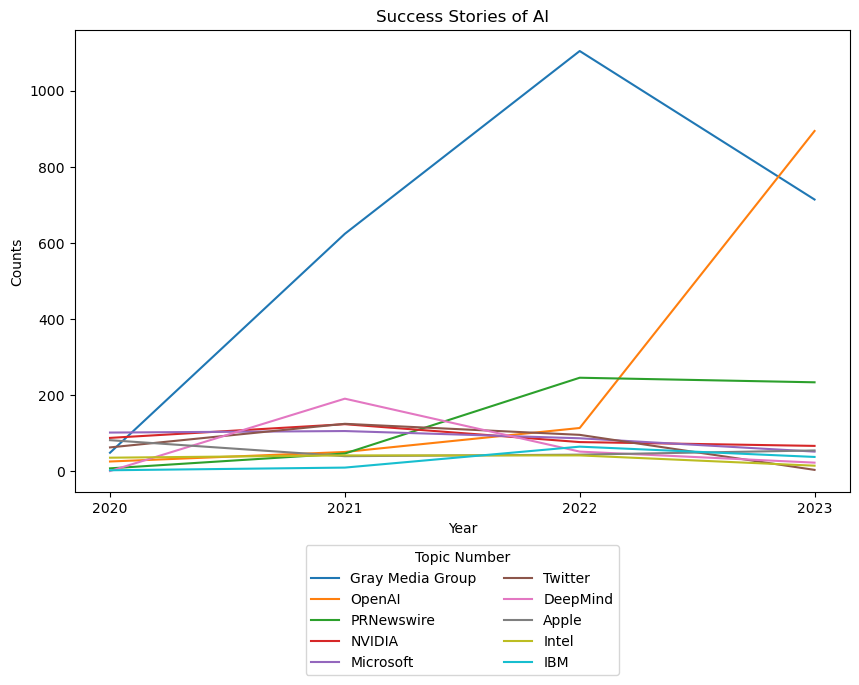

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Counts', hue='Topic', data=pos_topic_counts, palette='tab10')
plt.legend(loc='upper center',title='Topic Number', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(pos_topic_counts['year'].unique())
plt.xlabel('Year')
plt.title('Success Stories of AI')
plt.show()

In [8]:
pos_topic_sent = filtered_df.groupby(['Topic Number','year'])['Positive Probability'].mean().reset_index(name='Positive Probability')

In [9]:
pos_topic_sent['Topic'] = pos_topic_sent['Topic Number'].map(topic_mapping)

### Plotting Success stories of AI by Sentiment

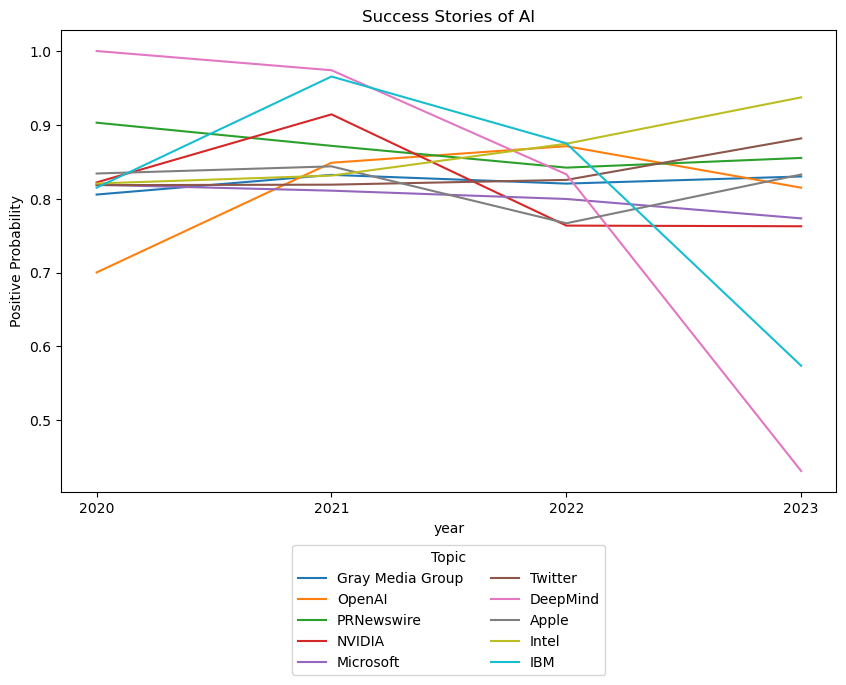

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Positive Probability', hue='Topic', data=pos_topic_sent, palette='tab10')
plt.legend(loc='upper center',title='Topic', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.xticks(pos_topic_sent['year'].unique())
plt.title('Success Stories of AI')
plt.show()